# PCA con datos de spotify

## Modulos

In [3]:
import pandas as pd 
import spotipy 
import json
import datetime 
import os

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 

## Configuracion de API

In [4]:
# Credenciales
cid ="60b986662af54fa2994d5e8087b00f1d" 
secret = "e03e361201c043fbafd24d372f7439ac" 

In [5]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

### Bajar datos

https://open.spotify.com/playlist/4Tf5k9f9FkkOfMtmGjOYF0?si=f83dda06b306483a

In [6]:
# Utilizar el id de la playlist de su preferencia
top_50_global = sp.user_playlist_tracks("bluterplay", "4Tf5k9f9FkkOfMtmGjOYF0?si=f83dda06b306483a")

In [7]:
# La consulta nos regresa un objeto en formato json
print(top_50_global.keys())

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])


In [8]:
# Inspeccionar los datos
#print(json.dumps(top_50_global['tracks']["items"], indent = 4))

## Tracks

In [9]:
tracks = top_50_global['tracks']['items']
len(tracks)

64

In [10]:
# Extraer el id de las canciones
ids = [] 
for i in range(len(tracks)): 
    ids.append(tracks[i]["track"]["id"]) 

### Caracteristicas de las canciones

In [11]:
# Obtener las características de las canciones
features=pd.DataFrame(sp.audio_features(ids))

In [12]:
features.shape

(64, 18)

In [13]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.378,0.0541,8,-19.237,1,0.0385,0.9300,0.002190,0.117,0.175,115.366,audio_features,2ax8gOAjvG2nbztOKKQRsk,spotify:track:2ax8gOAjvG2nbztOKKQRsk,https://api.spotify.com/v1/tracks/2ax8gOAjvG2n...,https://api.spotify.com/v1/audio-analysis/2ax8...,308622,5
1,0.454,0.4190,9,-5.678,1,0.0255,0.1960,0.003900,0.197,0.238,146.711,audio_features,3HMYsT5mnqQ57tVjvqlETb,spotify:track:3HMYsT5mnqQ57tVjvqlETb,https://api.spotify.com/v1/tracks/3HMYsT5mnqQ5...,https://api.spotify.com/v1/audio-analysis/3HMY...,256773,3
2,0.400,0.5410,7,-4.527,1,0.0274,0.5570,0.000021,0.136,0.268,99.343,audio_features,28UP90XhjCovLtieduYr9P,spotify:track:28UP90XhjCovLtieduYr9P,https://api.spotify.com/v1/tracks/28UP90XhjCov...,https://api.spotify.com/v1/audio-analysis/28UP...,227587,3
3,0.678,0.7980,2,-6.420,1,0.0275,0.3190,0.000008,0.692,0.688,115.995,audio_features,2VUKFxZjXI557zTA7VWXyc,spotify:track:2VUKFxZjXI557zTA7VWXyc,https://api.spotify.com/v1/tracks/2VUKFxZjXI55...,https://api.spotify.com/v1/audio-analysis/2VUK...,214947,4
4,0.596,0.4840,10,-7.998,1,0.0257,0.0244,0.016100,0.113,0.464,129.887,audio_features,1DiUilN3hDilolLnocCh31,spotify:track:1DiUilN3hDilolLnocCh31,https://api.spotify.com/v1/tracks/1DiUilN3hDil...,https://api.spotify.com/v1/audio-analysis/1DiU...,278520,3


### Extracción de datos

In [14]:
#Extraer otros datos útiles: artista, canción,... 

num_top = [(i+1) for i in range(len(tracks))]

artist_name = []
song_name = []
popularity = []

for item in top_50_global['tracks']['items']:
    artist_name.append(item['track']['album']['artists'][0]['name'])
    song_name.append(item['track']['name'])
    popularity.append(item['track']['popularity'])

In [15]:
# Agregar las características previas al dataframe
features['artist_name'] = artist_name
features['song_name'] = song_name
features['num_top'] = num_top
features['popularity'] = popularity

### Dataset final

In [16]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,artist_name,song_name,num_top,popularity
0,0.378,0.0541,8,-19.237,1,0.0385,0.9300,0.002190,0.117,0.175,...,2ax8gOAjvG2nbztOKKQRsk,spotify:track:2ax8gOAjvG2nbztOKKQRsk,https://api.spotify.com/v1/tracks/2ax8gOAjvG2n...,https://api.spotify.com/v1/audio-analysis/2ax8...,308622,5,Café Tacvba,El Mundo en Que Nací,1,32
1,0.454,0.4190,9,-5.678,1,0.0255,0.1960,0.003900,0.197,0.238,...,3HMYsT5mnqQ57tVjvqlETb,spotify:track:3HMYsT5mnqQ57tVjvqlETb,https://api.spotify.com/v1/tracks/3HMYsT5mnqQ5...,https://api.spotify.com/v1/audio-analysis/3HMY...,256773,3,Mon Laferte,Flaco,2,61
2,0.400,0.5410,7,-4.527,1,0.0274,0.5570,0.000021,0.136,0.268,...,28UP90XhjCovLtieduYr9P,spotify:track:28UP90XhjCovLtieduYr9P,https://api.spotify.com/v1/tracks/28UP90XhjCov...,https://api.spotify.com/v1/audio-analysis/28UP...,227587,3,Mon Laferte,Mi Buen Amor,3,74
3,0.678,0.7980,2,-6.420,1,0.0275,0.3190,0.000008,0.692,0.688,...,2VUKFxZjXI557zTA7VWXyc,spotify:track:2VUKFxZjXI557zTA7VWXyc,https://api.spotify.com/v1/tracks/2VUKFxZjXI55...,https://api.spotify.com/v1/audio-analysis/2VUK...,214947,4,Bronco,Corazón Duro ( Primera Fila ) - En Vivo,4,41
4,0.596,0.4840,10,-7.998,1,0.0257,0.0244,0.016100,0.113,0.464,...,1DiUilN3hDilolLnocCh31,spotify:track:1DiUilN3hDilolLnocCh31,https://api.spotify.com/v1/tracks/1DiUilN3hDil...,https://api.spotify.com/v1/audio-analysis/1DiU...,278520,3,Mon Laferte,Tu Falta De Querer,5,43


In [17]:
features.to_csv('playlist.csv', sep='|', index = False)

## PCA

### Selección de caracteristicas

In [18]:
df_songs=features[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence","artist_name","popularity"]]

In [19]:
df_songs.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,artist_name,popularity
0,0.378,0.0541,-19.237,0.0385,0.9300,0.002190,0.117,0.175,Café Tacvba,32
1,0.454,0.4190,-5.678,0.0255,0.1960,0.003900,0.197,0.238,Mon Laferte,61
2,0.400,0.5410,-4.527,0.0274,0.5570,0.000021,0.136,0.268,Mon Laferte,74
3,0.678,0.7980,-6.420,0.0275,0.3190,0.000008,0.692,0.688,Bronco,41
4,0.596,0.4840,-7.998,0.0257,0.0244,0.016100,0.113,0.464,Mon Laferte,43


In [20]:
X= df_songs.iloc[:,:8]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.378,0.0541,-19.237,0.0385,0.9300,0.002190,0.117,0.175
1,0.454,0.4190,-5.678,0.0255,0.1960,0.003900,0.197,0.238
2,0.400,0.5410,-4.527,0.0274,0.5570,0.000021,0.136,0.268
3,0.678,0.7980,-6.420,0.0275,0.3190,0.000008,0.692,0.688
4,0.596,0.4840,-7.998,0.0257,0.0244,0.016100,0.113,0.464


### Instancia de PCA

In [21]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(n_components=2, svd_solver='full')

#### Eingenvalores

In [22]:
pca.singular_values_**2

array([524.00990999,   6.63664772])

#### Componentes

In [24]:
X.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'],
      dtype='object')

In [31]:
print("Variable\t z1\t z2\t")
for i,column in enumerate(X.columns):
    print(f'{column}\t{pca.components_[0][i]} \t{pca.components_[1][i]}')

Variable	 z1	 z2	
danceability	0.00812977889743954 	-0.28924781077708756
energy	-0.05402005691279366 	-0.36760829564534286
loudness	-0.9963786463624101 	0.06807337300376565
speechiness	0.0020955396071533246 	-0.04095906821376436
acousticness	0.05983599218188631 	0.5867720770714934
instrumentalness	-0.0068088173603464384 	0.04041035877658385
liveness	-0.007436358916701441 	-0.01204113610659295
valence	-0.02364183886266502 	-0.6548349097798274


In [26]:
pca.components_[0]

array([ 0.00812978, -0.05402006, -0.99637865,  0.00209554,  0.05983599,
       -0.00680882, -0.00743636, -0.02364184])

#### Datos transformados

In [70]:
tabla_z = pca.transform(X)
print(tabla_z)

[[11.76576282  0.0264913 ]
 [-1.80927215  0.32106803]
 [-2.94175788  0.56287128]
 [-1.09554103 -0.16225976]
 [ 0.48490053 -0.14901643]
 [-1.05051984  0.06791982]
 [-1.02906357 -0.08659841]
 [-0.03152457 -0.12005872]
 [ 3.0556001  -0.24659654]
 [-0.8557539  -0.18026262]
 [ 0.14044704 -0.03497728]
 [-4.28772694  0.13906071]
 [-1.25256523  0.17665174]
 [-1.44388792 -0.43750569]
 [-2.17869002 -0.22815721]
 [ 1.80433742 -0.28090969]
 [ 2.25270765  0.16876691]
 [-1.79748026 -0.41490025]
 [-2.16361752 -0.28175515]
 [-1.55041611  0.26497466]
 [ 0.07422802  0.04495703]
 [ 3.37366629  0.42117085]
 [ 3.26268191  0.32693181]
 [-0.28788137  0.67556521]
 [ 3.78690922  0.52940218]
 [ 1.87147623  0.24236971]
 [-3.07044451  0.63413286]
 [-3.63836269  0.21262158]
 [-2.10579749  0.26644785]
 [ 2.00981238  0.41122604]
 [-3.62926838 -0.28307562]
 [ 0.26299986 -0.31576709]
 [-1.14159733  0.05953744]
 [ 6.54146456  0.24401002]
 [ 1.3610989  -0.40443506]
 [ 1.63308934 -0.17519966]
 [ 1.3716378  -0.38235985]
 

#### Varianza explicada

Como se lográ observar, con solo dos componentes, podemos explicar el $97  $% de la varianza

In [71]:
print(pca.explained_variance_ratio_)

[0.96887641 0.01227093]


### Visualización

In [72]:
df_songs["z1"] = tabla_z[:,0]
df_songs["z2"] = tabla_z[:,1]

/tmp/ipykernel_95/4285254841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs["z1"] = tabla_z[:,0]
/tmp/ipykernel_95/4285254841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs["z2"] = tabla_z[:,1]


Text(0.5, 1.0, 'PCA agrupado por artista y popularidad de la canción')

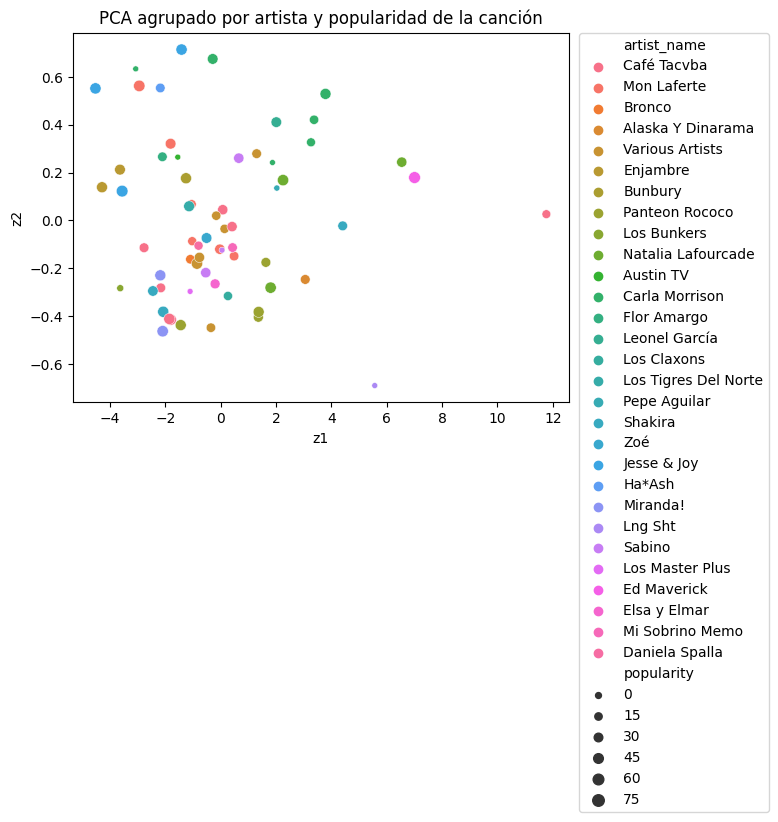

In [76]:
sns.scatterplot(x='z1',y= 'z2',data= df_songs, hue= 'artist_name', legend="brief", size='popularity')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("PCA agrupado por artista y popularidad de la canción")